## 시각화 도구 사용하기

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 추가적으로 시각화 하는 도구
import seaborn as sns

### Line plot 선그래프

In [2]:
# 배열 데이터 생성하기
x= np.arange(1,6)
# seed 랜덤한 수를 고정하는 값
np.random.seed(3)
y =np.random.randint(1,10,size=5)
print(x,y)

[1 2 3 4 5] [9 4 9 9 1]


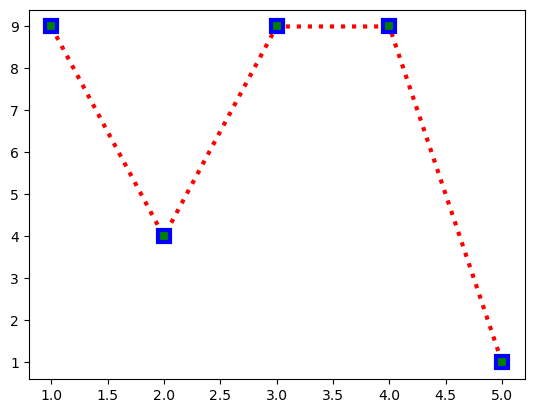

In [3]:
# 선그래프 그리기
plt.plot(x,y, c='red', lw=3, ls=':', marker='s', ms = 9 , mec='blue',mew=3,mfc='green')
plt.show()

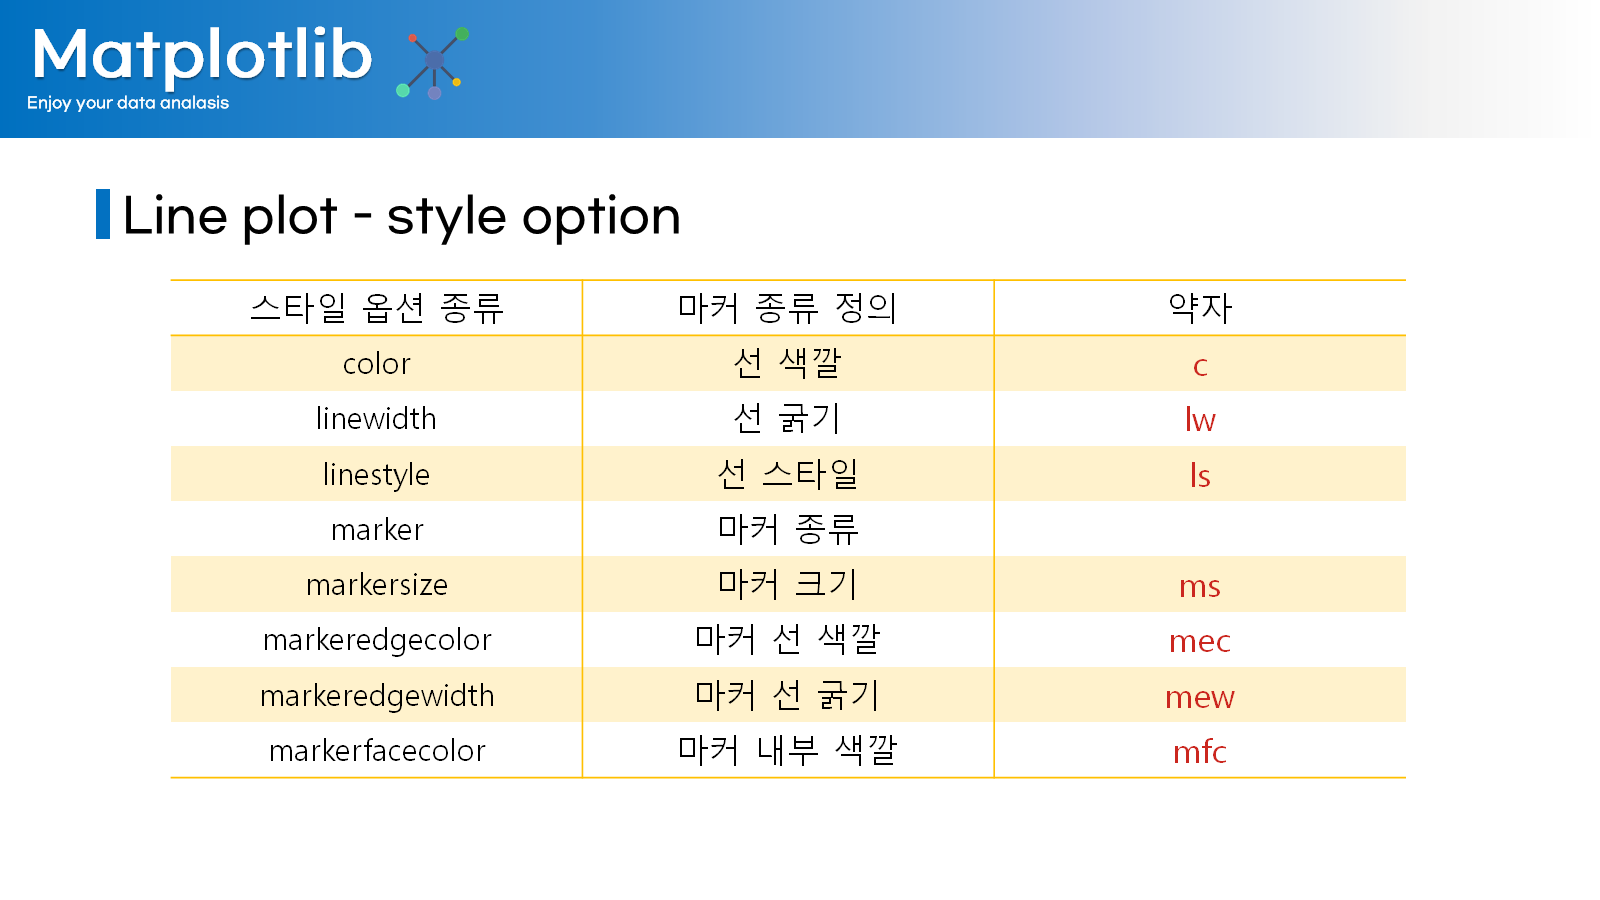

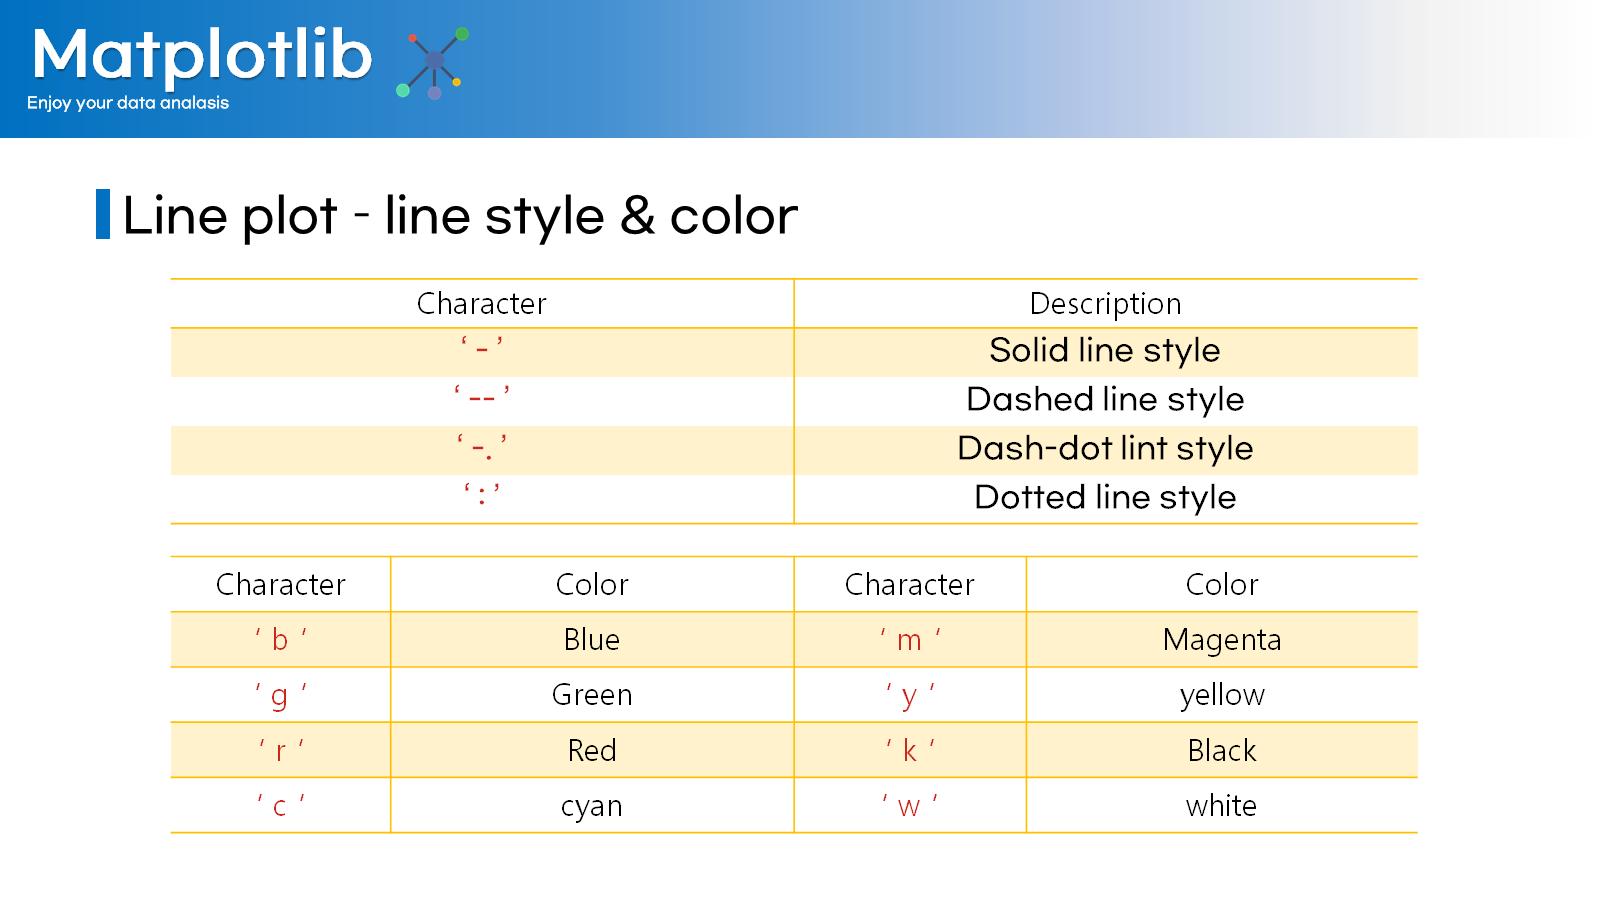

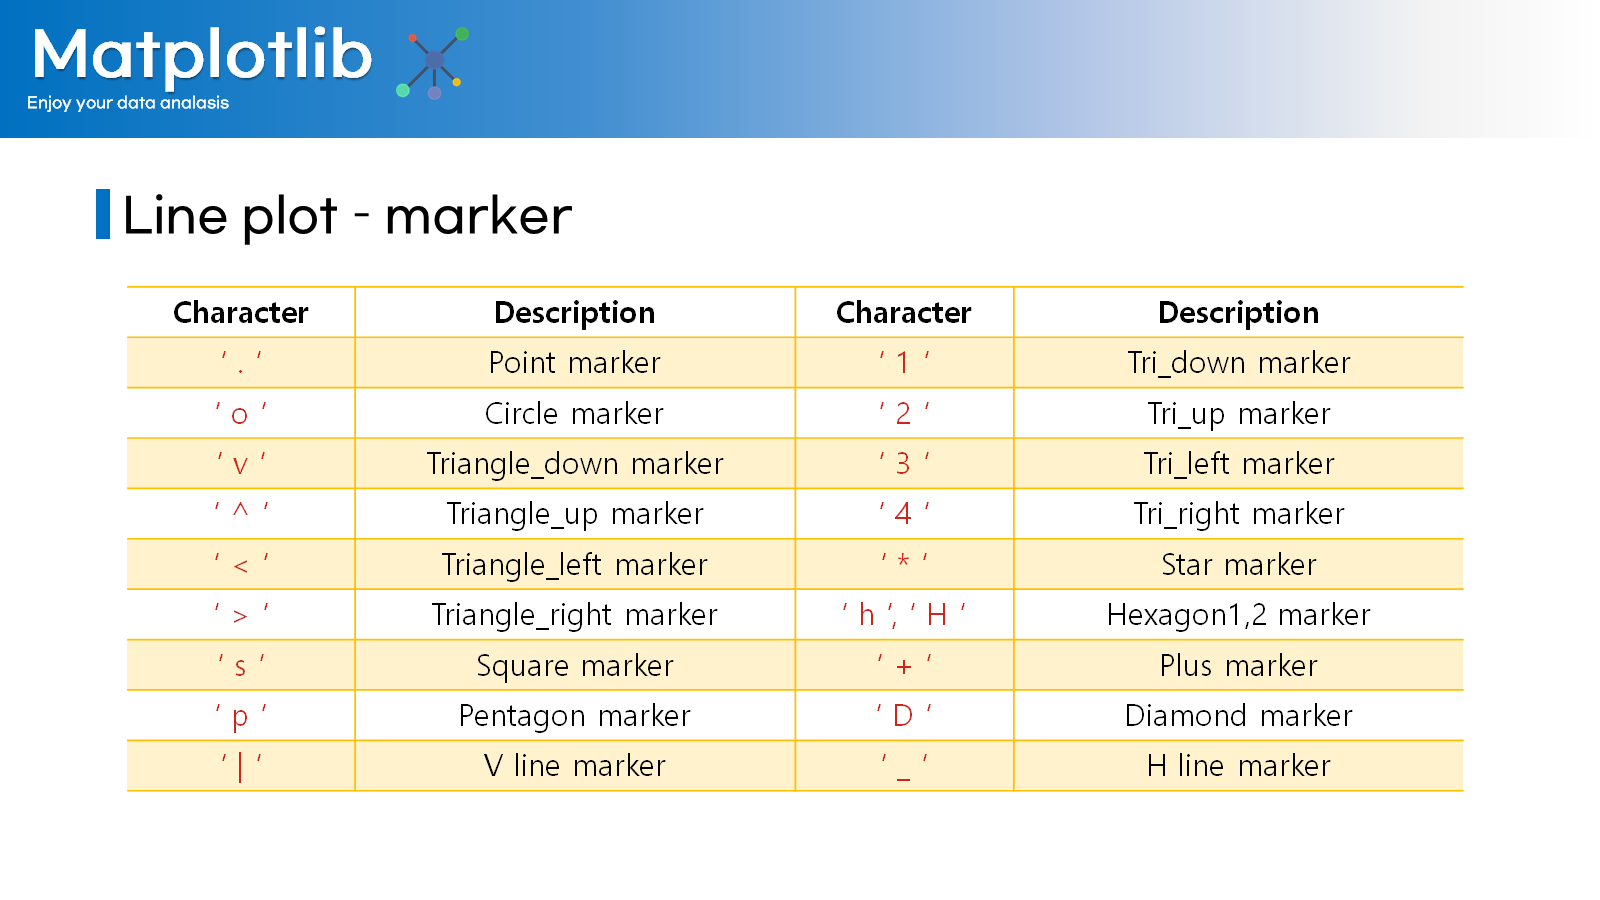

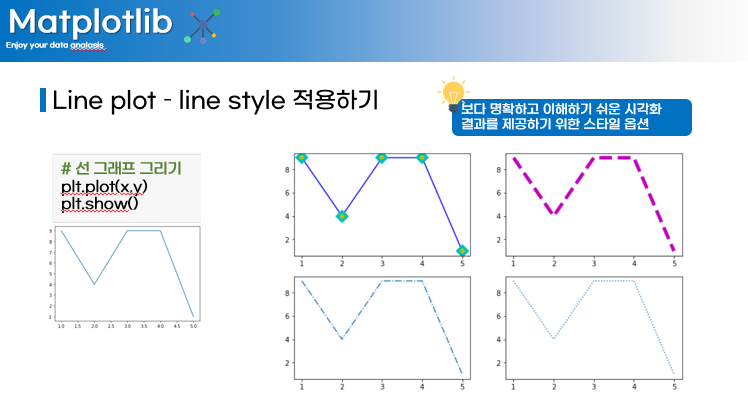

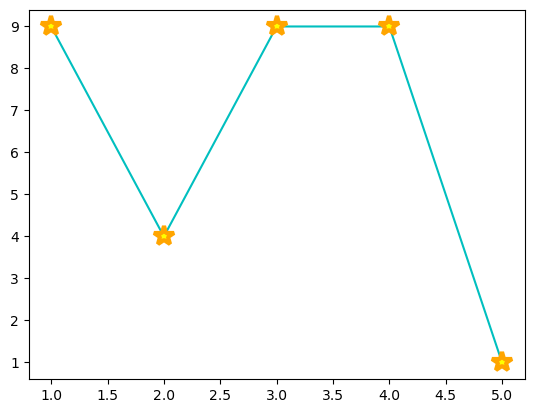

In [4]:
plt.plot(x,y, marker='*', mew = 3, mec = 'orange',mfc = 'yellow', ms = 15, c = 'c')
plt.show()

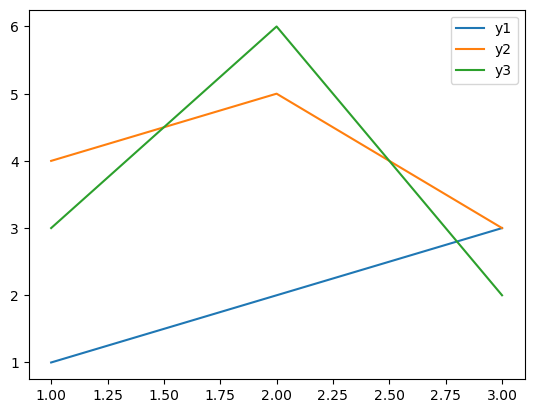

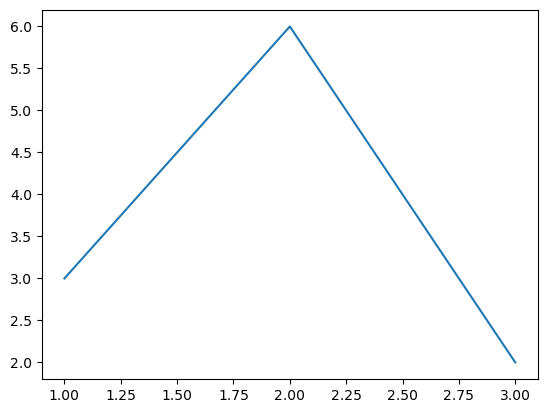

In [5]:
x=[1,2,3]
y1=[1,2,3]
y2=np.array([4,5,3])
y3=np.array([3,6,2])
plt.plot(x,y1,label='y1')
plt.plot(x,y2,label='y2')
plt.plot(x,y3,label='y3')
plt.legend()#범례 표시
plt.show()
plt.plot(x,y3,label='y3') # 범례 표시 X(구분 지어줬기 때문)
plt.show()

- subplot() - 한창에 칸 여러개를 나눠서 여러개 동시 표현

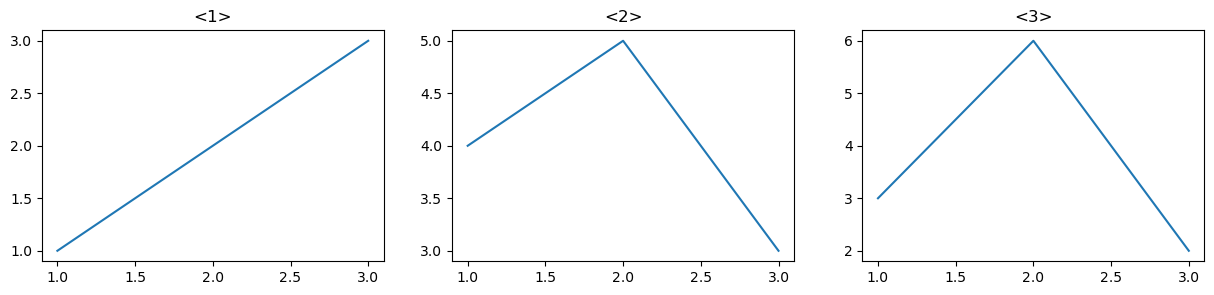

In [6]:
# x, y1, y2, y3
# 창(도화지) 크기 설정
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.title('<1>')
plt.plot(x,y1)

plt.subplot(1,3,2)
plt.title('<2>')
plt.plot(x,y2)

plt.subplot(1,3,3)
plt.title('<3>')
plt.plot(x,y3)
plt.show()

### 예제1
 - 인구데이터 분석 실습 - 장래 인구변동 데이터를 이용하여 lineplot로 출생아수, 사망자수

In [7]:
data=pd.read_csv('./data/장래_인구변동_KOSIS.csv', 
                 encoding='EUC-KR', index_col='인구변동요인별')
data
# data.info()
# data.shape
# data.index

FileNotFoundError: [Errno 2] No such file or directory: './data/장래_인구변동_KOSIS.csv'

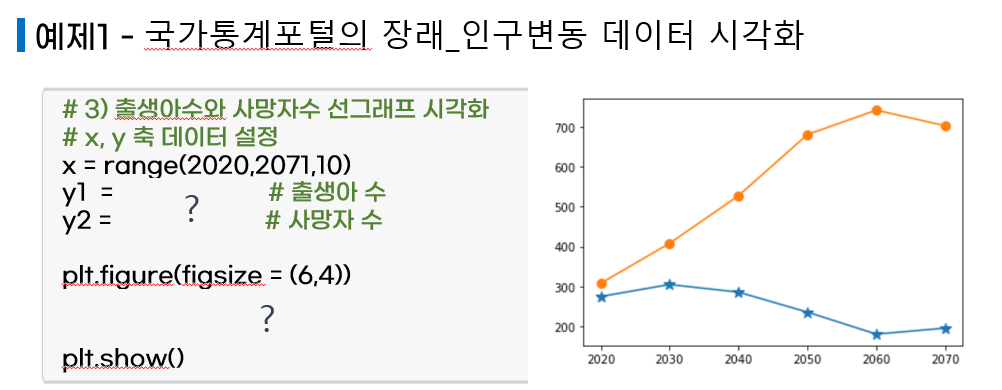

In [ ]:
# 그래프에 한글 보이기
# 1. 한글 폰트 경로
# 2. 폰트 이름 확인
# 3. rc 도구에 폰트 이름 연결
from matplotlib import font_manager, rc
path='C:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)


In [ ]:
# 요약 가능
from matplotlib import font_manager, rc
rc('font',family='malgun')

In [ ]:
x = range(2020,2071,10)
y1= data.loc['출생아수(천명)']
y2= data.loc['사망자수(천명)']

plt.figure(figsize=(6,4))
plt.title("장래 인구변동 시각화") # 한글 폰트 지원하도록 연결
plt.plot(x,y1,label='출생아수(천명)',marker='*',ms=10)
plt.plot(x,y2,label='사망자수(천명)',marker='o')

plt.xlabel('년도'); plt.ylabel('인구수')
plt.xticks(range(2020,2071,5))
# plt.ylim(500,750) # 줌인
plt.legend(); plt.grid()
# plt.show()
plt.savefig('./data/kosis 장래 인구변동 시각화2.png',dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
# 행, 열 전환 키워드-T
t_data =data.T
t_data.loc[:,'출생아수(천명)']

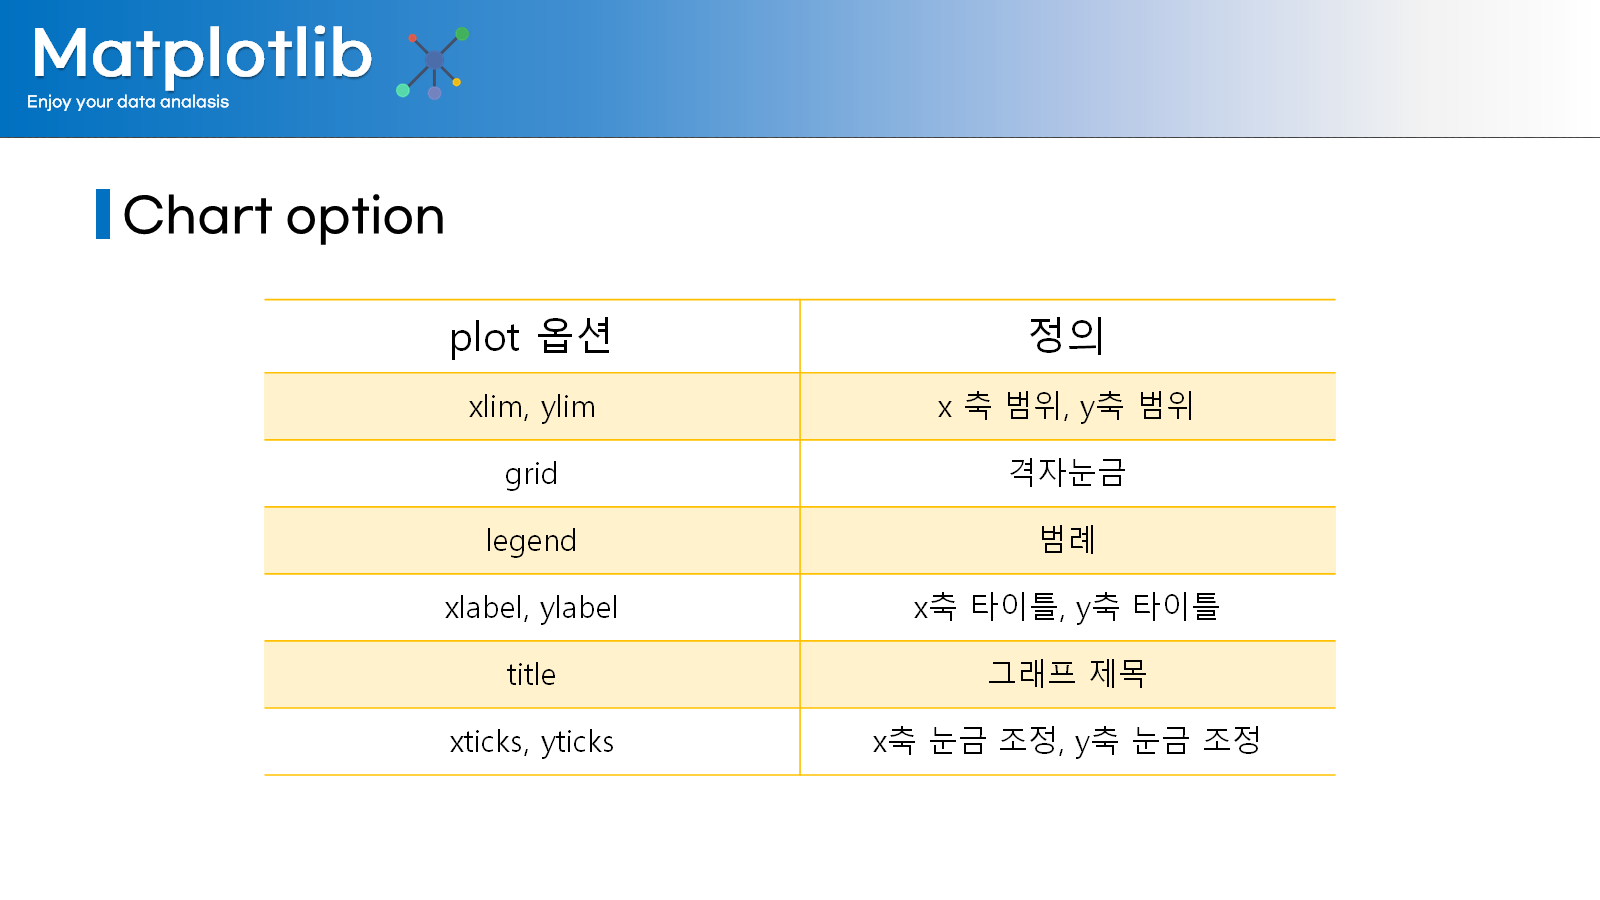

### 예제2
 - 기온변화 시각화
 - 공공데이터 포털사이트에 접속하여 검색 조건을 입력하고, csv 버튼 클릭 > 데이터 다운로드

In [ ]:
td= pd.read_csv('./data/기온데이터(1994-2023).csv', encoding='euc-kr',skiprows = range(0,7))
td.head(5)

# td.info()

In [ ]:
td.head(5)

In [ ]:
# 전체 평균기온 변화 시각화

In [ ]:
# 1. 평균기온 컬럼 인덱싱(접근)
# 2. 선그래프 그리기(x축 지정x)
x = td.iloc[:,0]
y = td.iloc[:,2]
plt.plot(y)

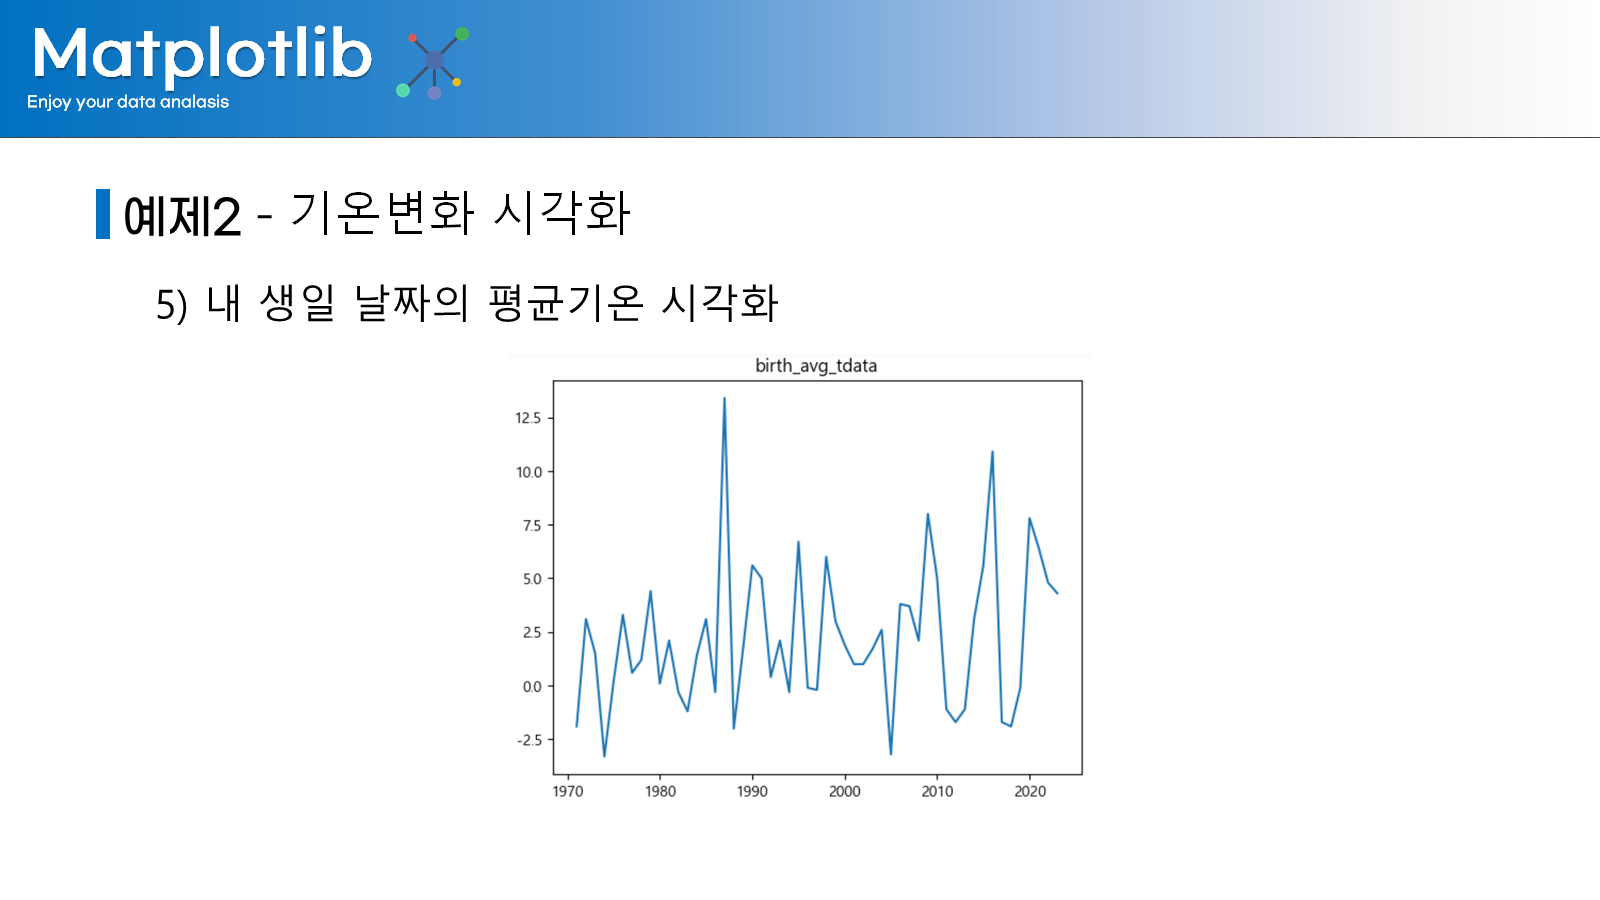

In [ ]:
# str
# 1. 월일 정보를 담은 파생변수 추가
# 2. 내 생일 데이터가 있는 행 정보 접근
# 3. 그래프 그리기
td['월일']=td['날짜'].str[6:]
td['월일']
# td.query("월일=='11-17'")
td_bd=td[td['월일']=="11-17"]

plt.plot(td_bd['평균기온(℃)'])
plt.title("birth_avg_tdata")
plt.show()


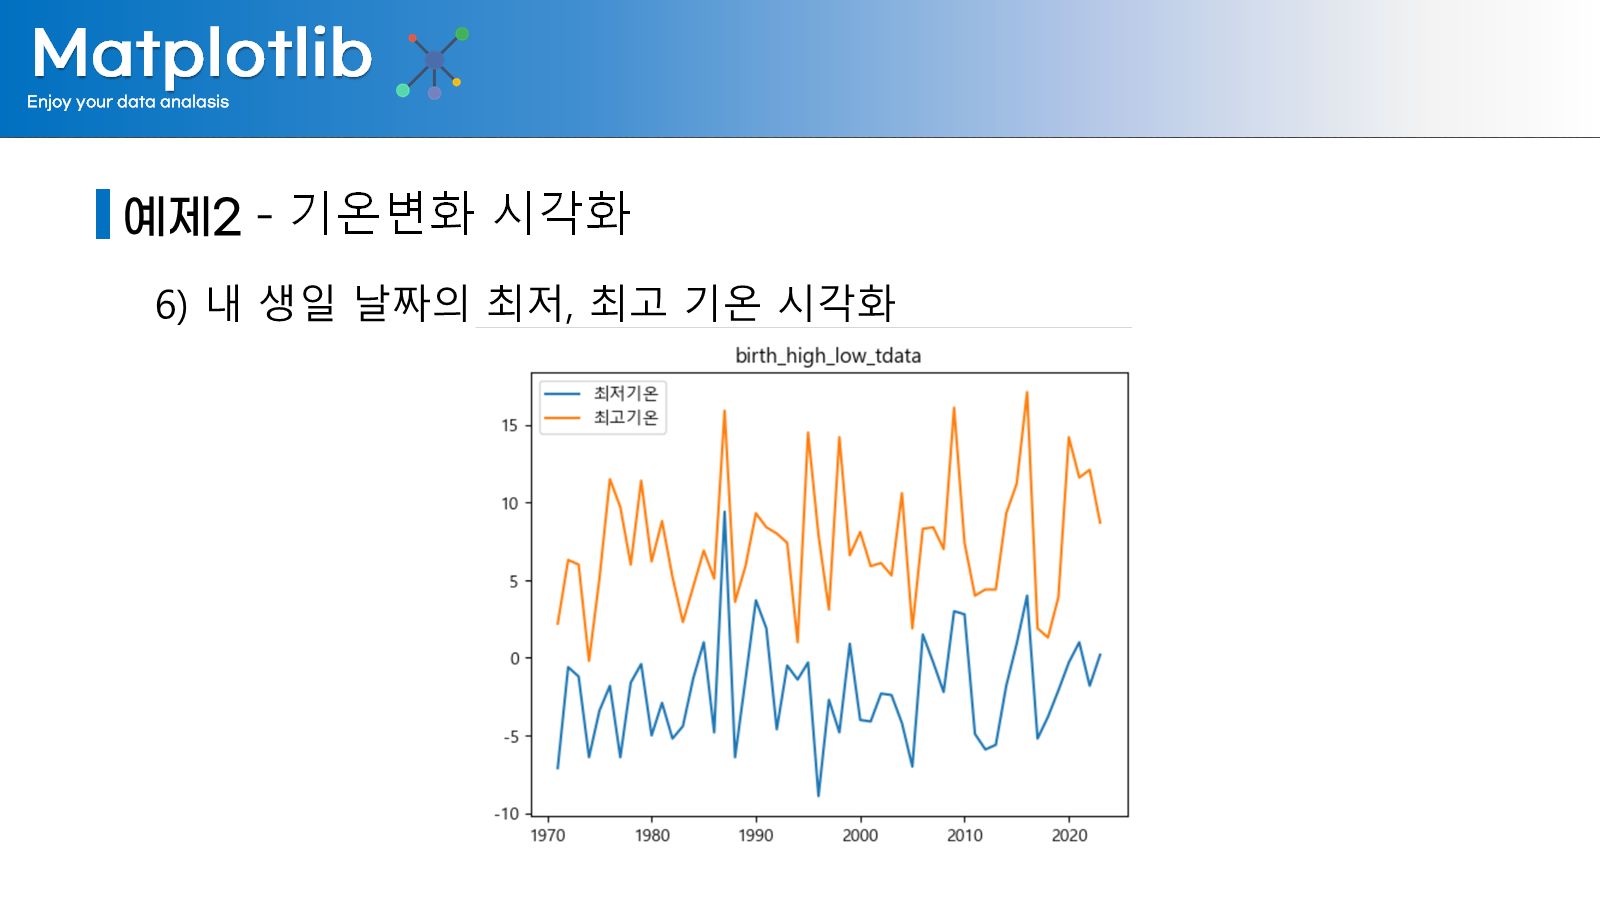

In [ ]:
from matplotlib import font_manager, rc
path='C:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

plt.plot(range(1994,2024),td_bd['최고기온(℃)'],label='최고기온(℃)')
plt.plot(range(1994,2024),td_bd['최저기온(℃)'],label='최저기온(℃)')
plt.title("birth_high_low_tdata")
plt.legend()
plt.show()

### histogram
 - 범위를 나눠 데이터 빈도를 그래프로 표현한 것

In [ ]:
np.random.seed(3)
a= np.random.randint(1,101,size=100)
print(a)

In [ ]:
plt.hist(a,bins=5) # bins 명확히 표현
plt.show()

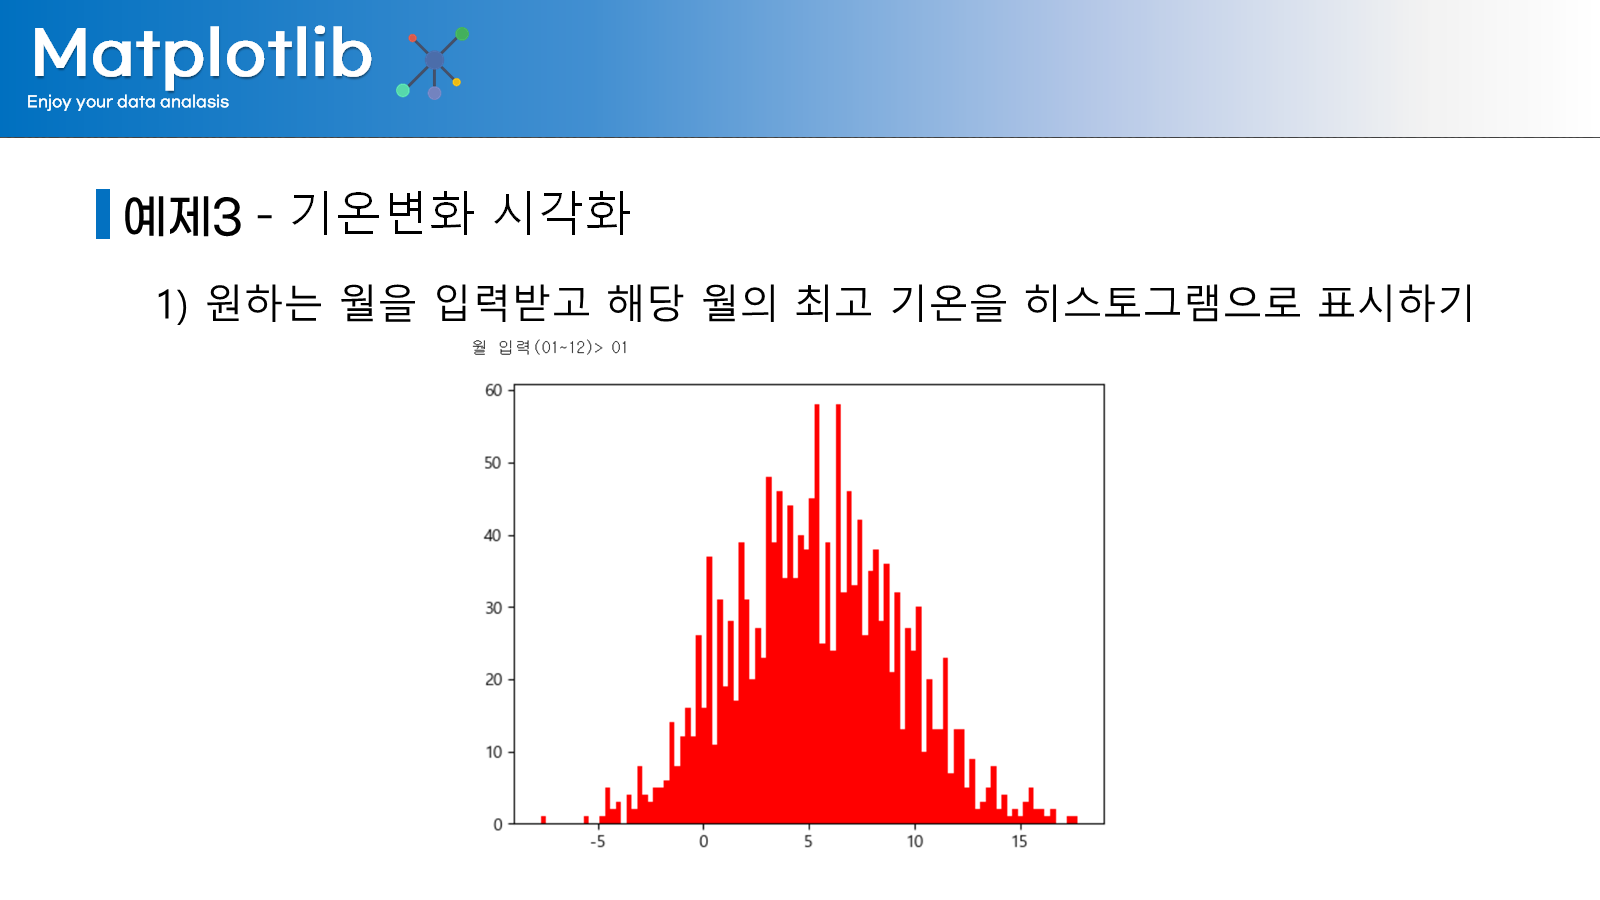

In [ ]:
td.head(5)

In [ ]:
td.iloc[:,0]
td['월']=td['날짜'].str[6:8] # 파생변수
month = input("월 입력(01~12)>> ")
td_mon=td.query(f"월=='{month}'")
td_mon

plt.hist(td_mon['최고기온(℃)'],bins=100, edgecolor='black')
plt.show()
# x축 기온, y기온 구간(범위)에 대한 날짜 개수
# alpha 투명도 설정 : 0~1 값으로 설정


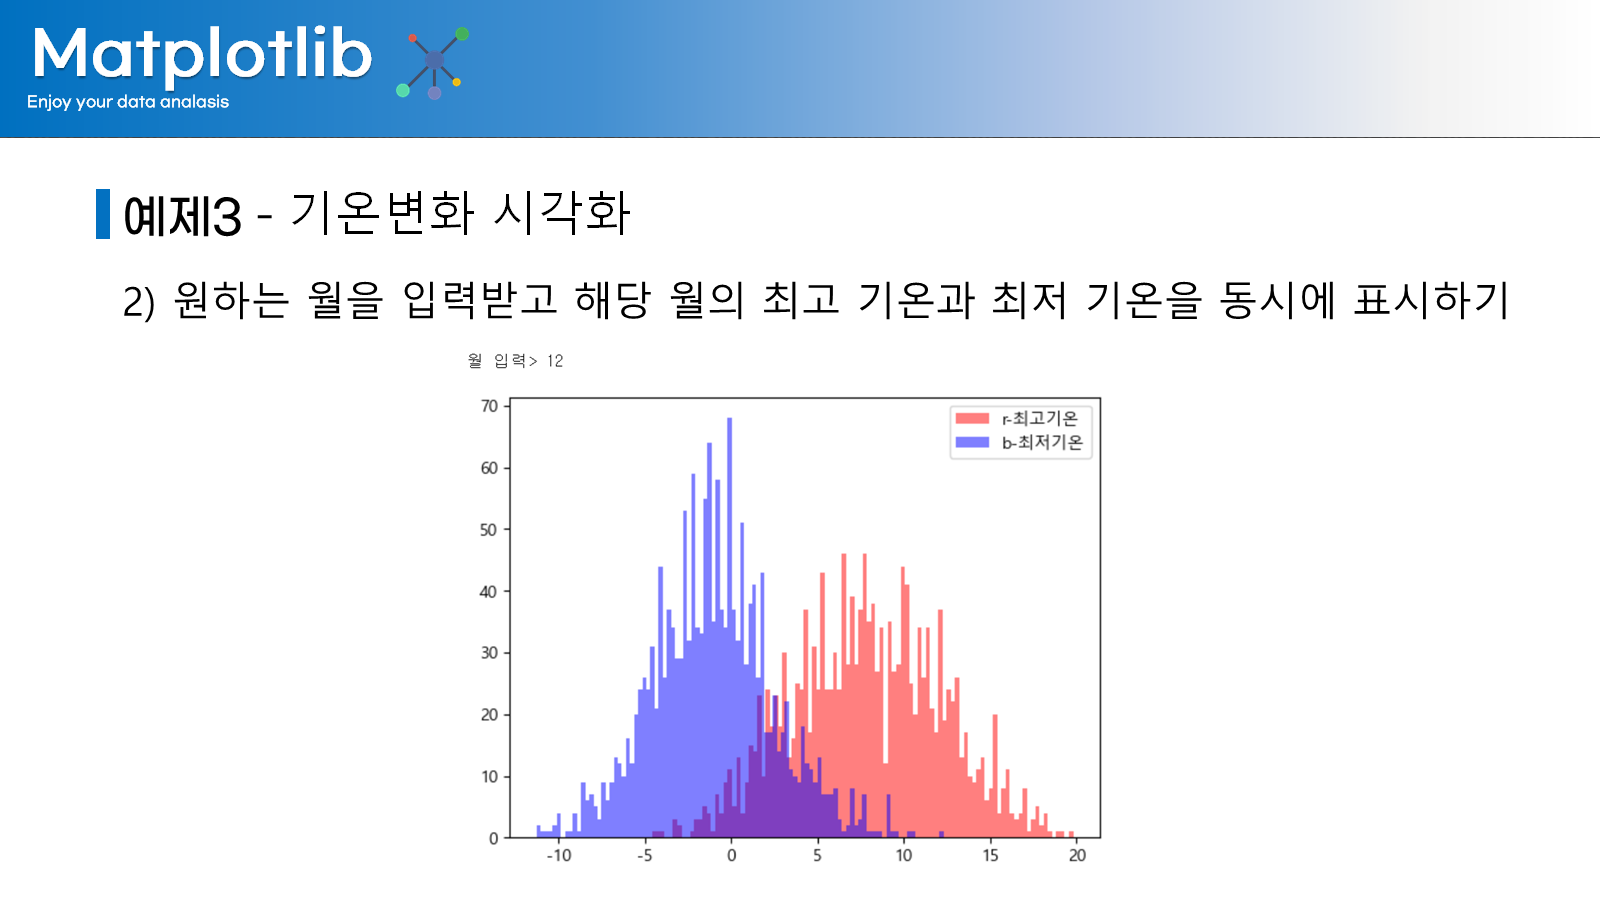

In [ ]:
td.iloc[:,0]
td['월']=td['날짜'].str[6:8] # 파생변수
month = input("월 입력(01~12)>> ")
td_mon=td.query(f"월=='{month}'")
td_mon

plt.hist(td_mon['최고기온(℃)'],bins=100, alpha = 0.5 , label="최고기온", color='red')
plt.hist(td_mon['최저기온(℃)'],bins=100, alpha = 0.5 ,label="최저기온", color='blue')
plt.legend(loc='upper center')
plt.rcParams['axes.unicode_minus']=False
plt.show()

### Box plot 상자그래프
 - 수치형태의 데이터를 표현할 때 자주 사용 그래프

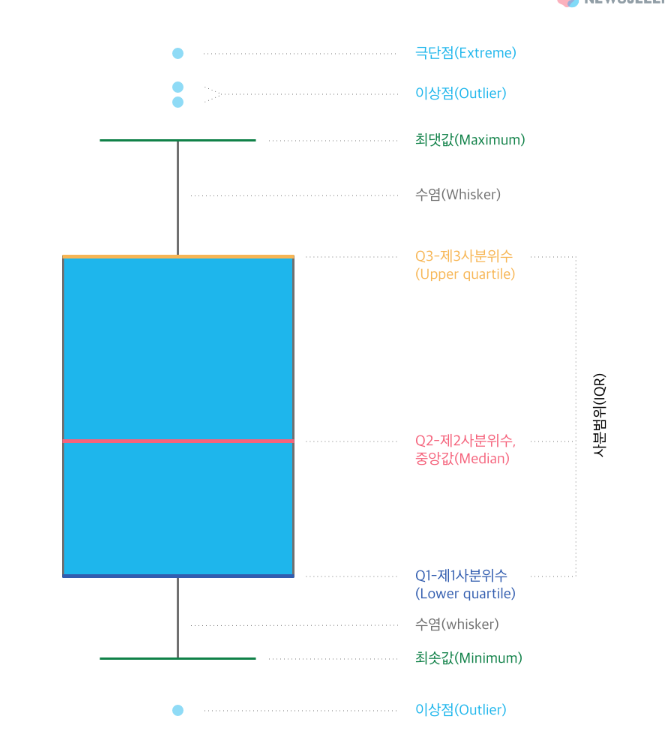

In [ ]:
# 1d 데이터 준비 > 박스 플롯 그리기
tmp_data=np.random.randint(1,10,size=10)
plt.boxplot(tmp_data, labels=['데이터명'])
plt.show()

In [ ]:
# 2d 데이터 준비 > 박스 플롯 그리기
tmp_data=np.random.randint(1,49,size=(10,2))
tmp_data
plt.boxplot(tmp_data,labels=['1열','2열'])
plt.show()
# 2차원 데이터 > box plot 2개 그려짐
# 컬럼(열) 한개씩 인식 > 그래프 그려줌

 입력 받은 월의 평균기온 구하기
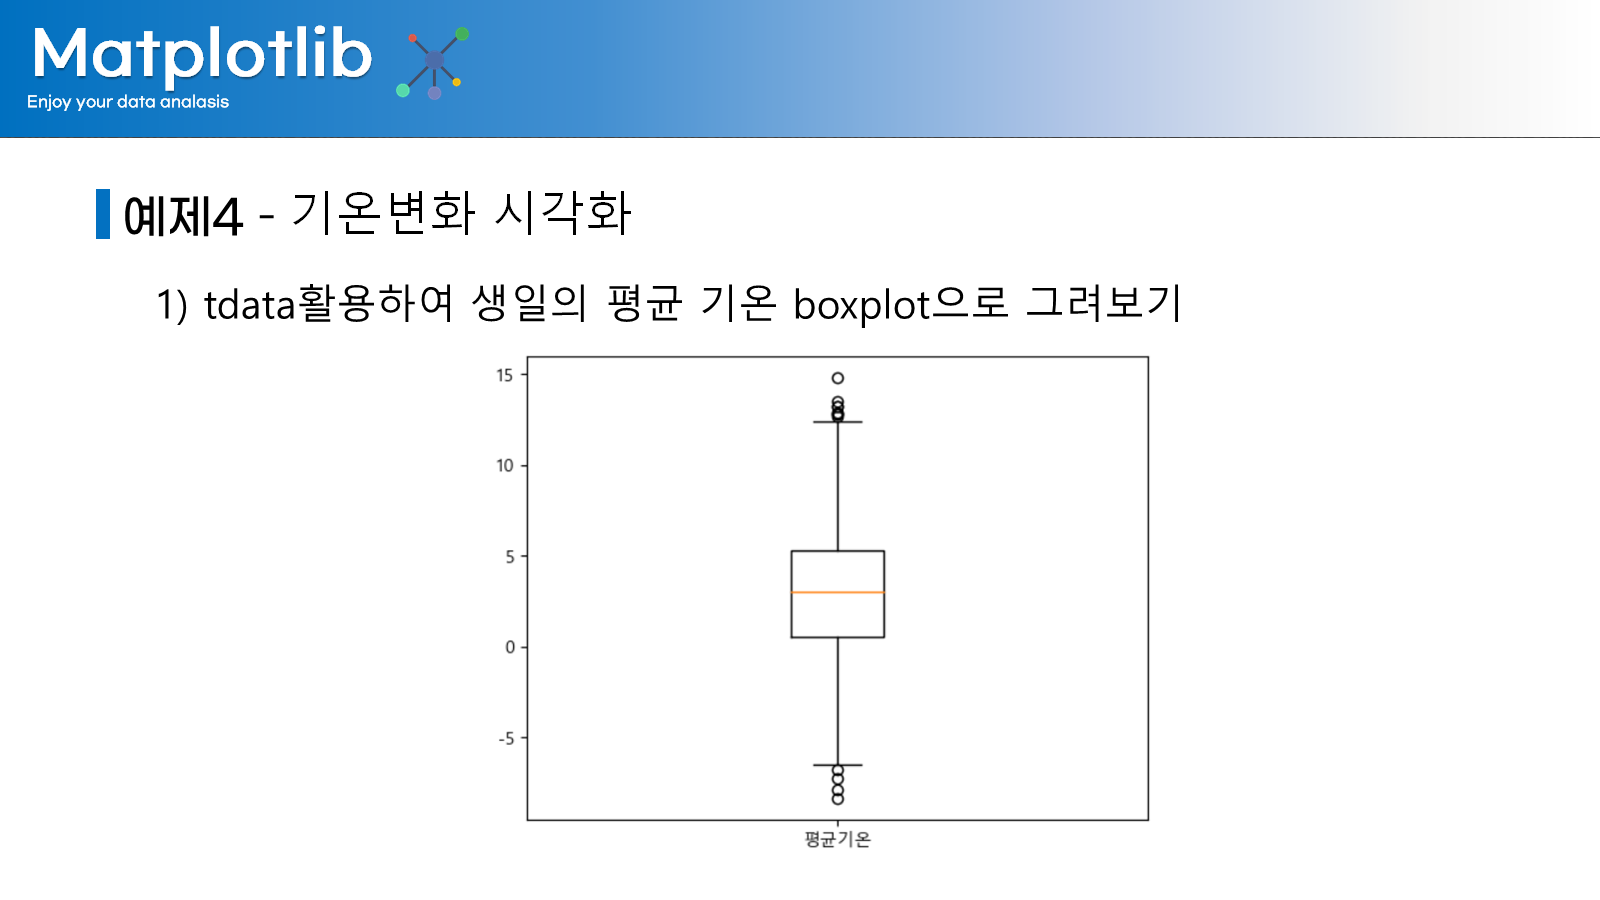

In [ ]:
td.iloc[:,0]
td['월']=td['날짜'].str[6:8] # 파생변수
month = input("월 입력(01~12)>> ")
td_mon=td.query(f"월=='{month}'")

plt.boxplot(td_mon['평균기온(℃)'],labels=[f'{month}월 평균'])
plt.show()


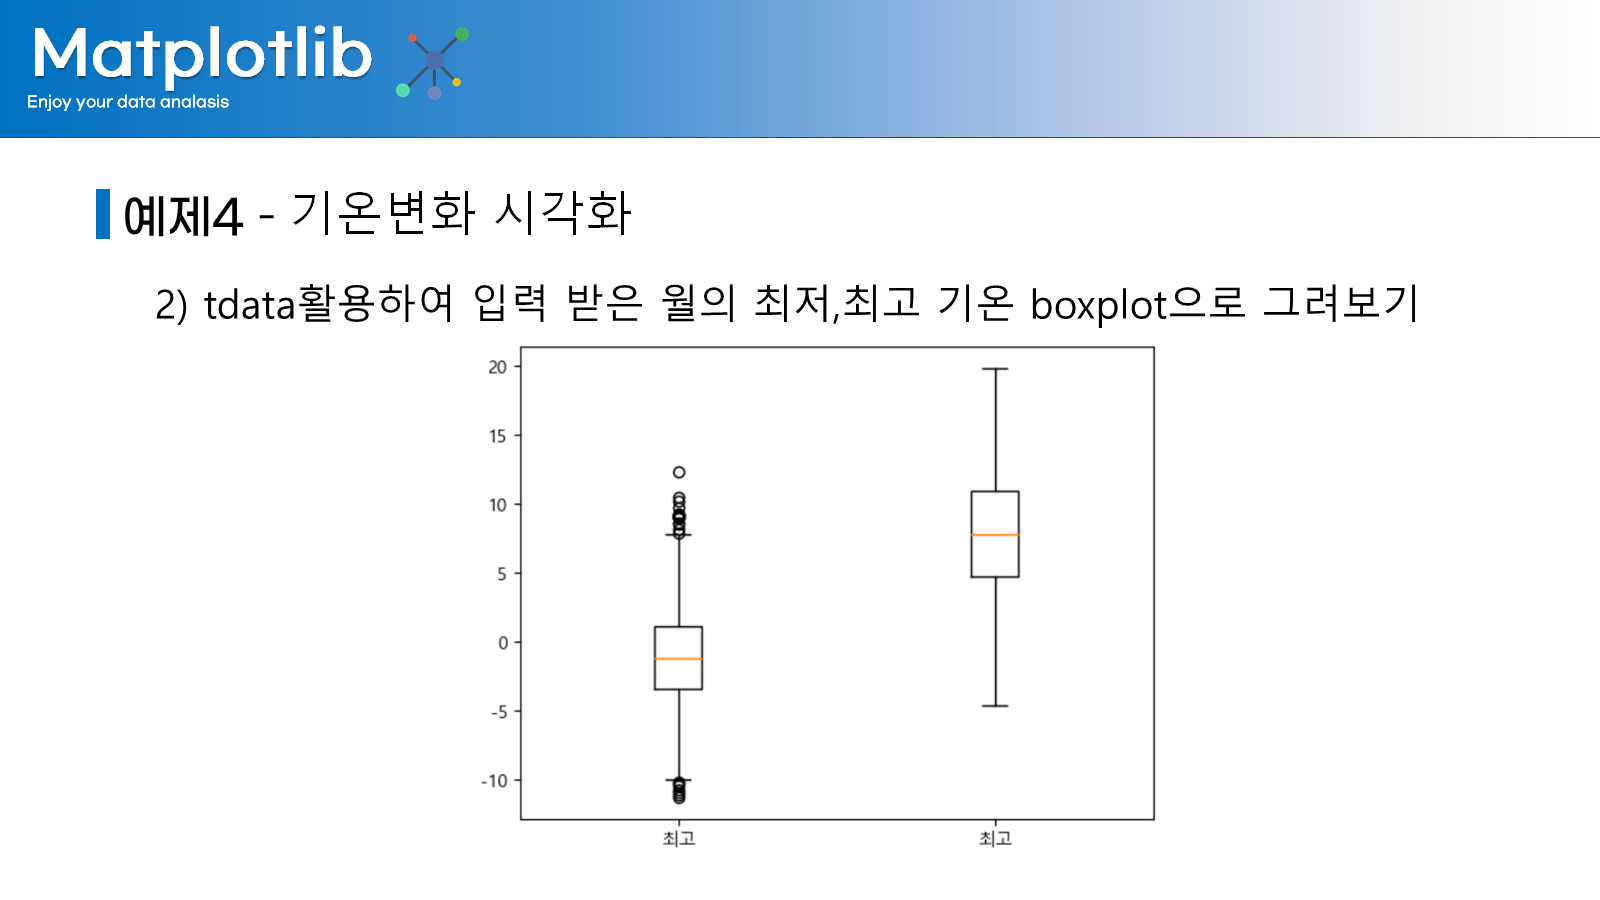

In [ ]:
td.iloc[:,0]
td['월']=td['날짜'].str[6:8] # 파생변수
month = input("월 입력(01~12)>> ")
td_mon=td.query(f"월=='{month}'")

plt.boxplot([td_mon['최고기온(℃)'],td_mon['최저기온(℃)']], 
            labels=[f'{month}월 최고',f'{month}월 최저'])
plt.show()

### bar plot 막대그래프

In [ ]:
# 데이터 준비
# 그래프
np.random.seed(6)
# x [1~3]
# y 50~100 랜덤 3개 셋팅(1차원)
bar_x = np.arange(1,4)
bar_y = np.random.randint(50,101,size=3)
print(bar_x, bar_y)

plt.bar(bar_x,bar_y)
plt.show()

In [ ]:
# 그래프 옵션 추가
# 막대 그래프 색상 변경, 텍스트 출력
plt.bar(bar_x,bar_y, color=['red','orange','magenta'])
# 3개의 막대그래프 좌표 접근, text 출력되게 만들어야함 plt.text()
for i in range(len(bar_x)):
    # plt.text(x,y,text표현 y값)
    plt.text(bar_x[i],bar_y[i]+2,bar_y[i], fontdict={'color':'blue','size':20})
plt.xticks(range(1,4))
plt.show()

### 예제3) 국가통계포털 경제활동 인구 데이터 활용 - 데이터 분석 및 시각화

In [ ]:
#1. 데이터 불러오기
economi = pd.read_csv('./data/시도_성별_경제활동인구_총괄_KOSIS_2022.csv',encoding='euc-kr')
economi.head()

In [ ]:
economi.info()


In [ ]:
economi.isnull().sum()

In [ ]:
# 실업률 컬럼의 결측치가 있는 행 전부 출력
economi[economi['실업률(%)'].isnull()]

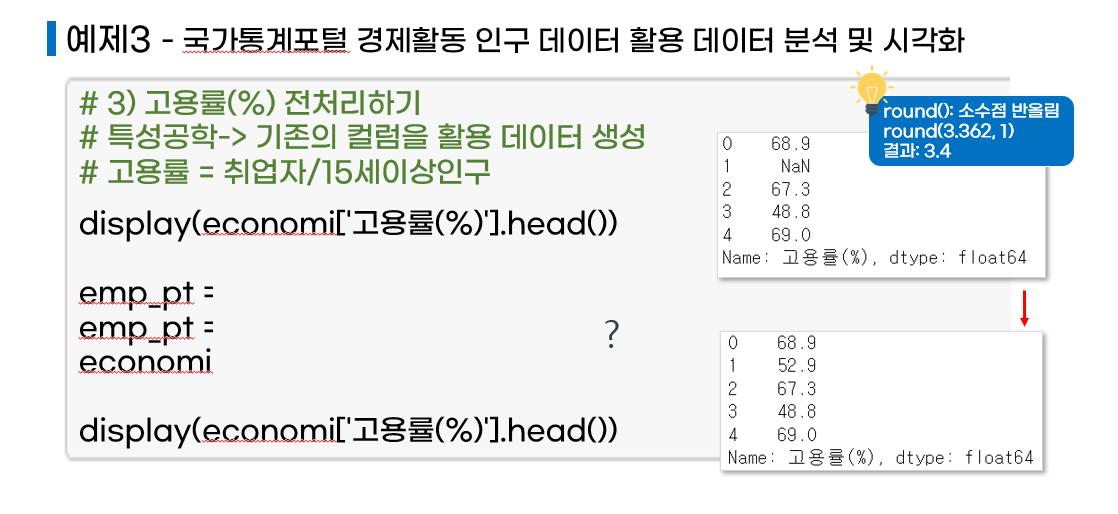

In [ ]:
# 3. 고용률(%) 컬럼 전처리하기(preprocessing : 이전에 처리한다)
# 기존의 값을 통해 고용률 값을 뽑아냄 > 빈값 채우기 >> 특성공학
# 고용률 = 취업자/15세 이상 인구 (배열간 나누기 연산)

In [ ]:
display(economi['고용률(%)'].head())
emp_pt=round(economi['취업자 (천명)']/economi['15세이상인구 (천명)']*100,1)
economi['고용률(%)']= emp_pt
# emp_pt.iloc[0,1]
# economi['고용률(%)']=economi['고용률(%)'].fillna[emp_pt]
display(economi['고용률(%)'].head())

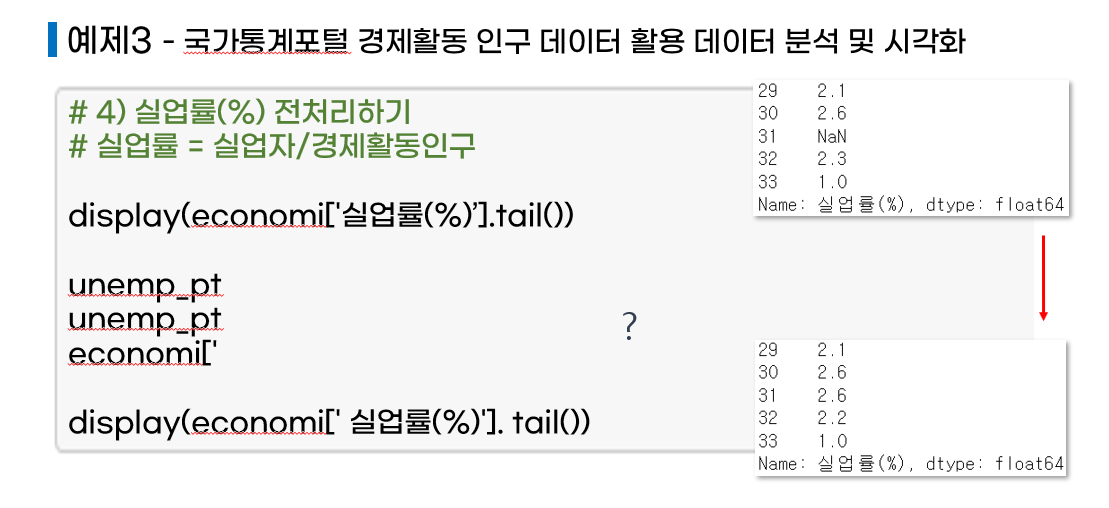

In [ ]:
economi.columns

In [ ]:
display(economi['실업률(%)'].tail())
unemp_pt = round(economi['실업자 (천명)']/economi['경제활동인구 (천명)']*100,1)
economi['실업률(%)']=unemp_pt
display(economi['실업률(%)'].tail())
economi.info()


In [ ]:
economi.head()

In [ ]:
# 시도별 고용률 평균 구하기
# emp_mean=economi[['행정구역(시도)','고용률(%)']].groupby('행정구역(시도)').mean()
emp_mean = economi.groupby('행정구역(시도)')['고용률(%)'].mean().reset_index()
x= emp_mean['행정구역(시도)']
y= emp_mean['고용률(%)']
# 시도별 고용률 평균 막대그래프
plt.bar(x,y)
plt.xticks(rotation=45) # rotation : 회전 각도 설정 
plt.ylim(45,75)
plt.show()

In [ ]:
# as_index = False : 그룹by 기준열을 인덱스 말고 컬럼으로 유지하겠다
economi[['행정구역(시도)','고용률(%)']].groupby('행정구역(시도)', as_index=False).mean()

In [ ]:
# 수평 막대바 그리기
plt.barh(x,y)
plt.show()

In [ ]:
sns.barplot(x=x,y=y,palette='pastel') # seaborn
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 6. 시도별 남자 실업률을 막대그래프 시각화 하고 가장 높은 곳이 어디인지 확인하기
emp_man=economi.query("성별=='남자'")
man_unemp= emp_man[['행정구역(시도)','실업률(%)']]
man_unemp
y=emp_man.loc[:,'실업률(%)']
x=emp_man.loc[:,'행정구역(시도)']

plt.bar(x,y)
plt.xticks(rotation = 45)
sns.barplot(x=x,y=y,palette='husl')
plt.title("시도별 남자 실업률")
for i in range(len(x)):
    # plt.text(x,y,text표현 y값)
    plt.text(x[i],y[i],f'{y[i]}')
plt.grid(ls=':')
plt.show()

In [ ]:
y[1]

### scatter plot 산점도

In [ ]:
np.random.seed(2)
x = np.arange(1,4)
y = np.random.randint(1,20,3)
print(x,y)

plt.scatter(x,y,s=[50,200,100], c=['r','y','c'])
plt.figure(figsize=(3,2))
plt.show()

In [ ]:
# 색상바 설정
np.random.seed(2)
x = np.arange(1,4)
y = [100,200,300]
print(x,y)

plt.scatter(x,y,s=y, c=range(3), cmap='cool')
plt.colorbar() # 데이터 오름차순 정렬된 후 사용해야 시각적!
plt.figure(figsize=(3,2))
plt.show()

### pie plot 파이플롯

In [ ]:
print(x,y)

In [ ]:
for i in y : 
    print(f'{i/sum(y)*100}')

plt.pie(y,labels=x, autopct='%.2f%%', colors=['r','y','c'], explode=[0.1,0,0])
plt.legend()
plt.show()
# %% 이스케이프 코드 -> % 문자열 출력

    
# list.sum() >> list 클래스에 사용되는 sum 메소드 사용하겠다 설정(실행안됨)
# nparr.sum() >> nparr 클래스 내부에 sum 메소드 있음 > 사용 가능
# df, series.sum() >> pandas 객체를 설명하는 클래스 내부에 sum 메소드가 있음
# sum(list)> 파이썬 기초 내장 함수()

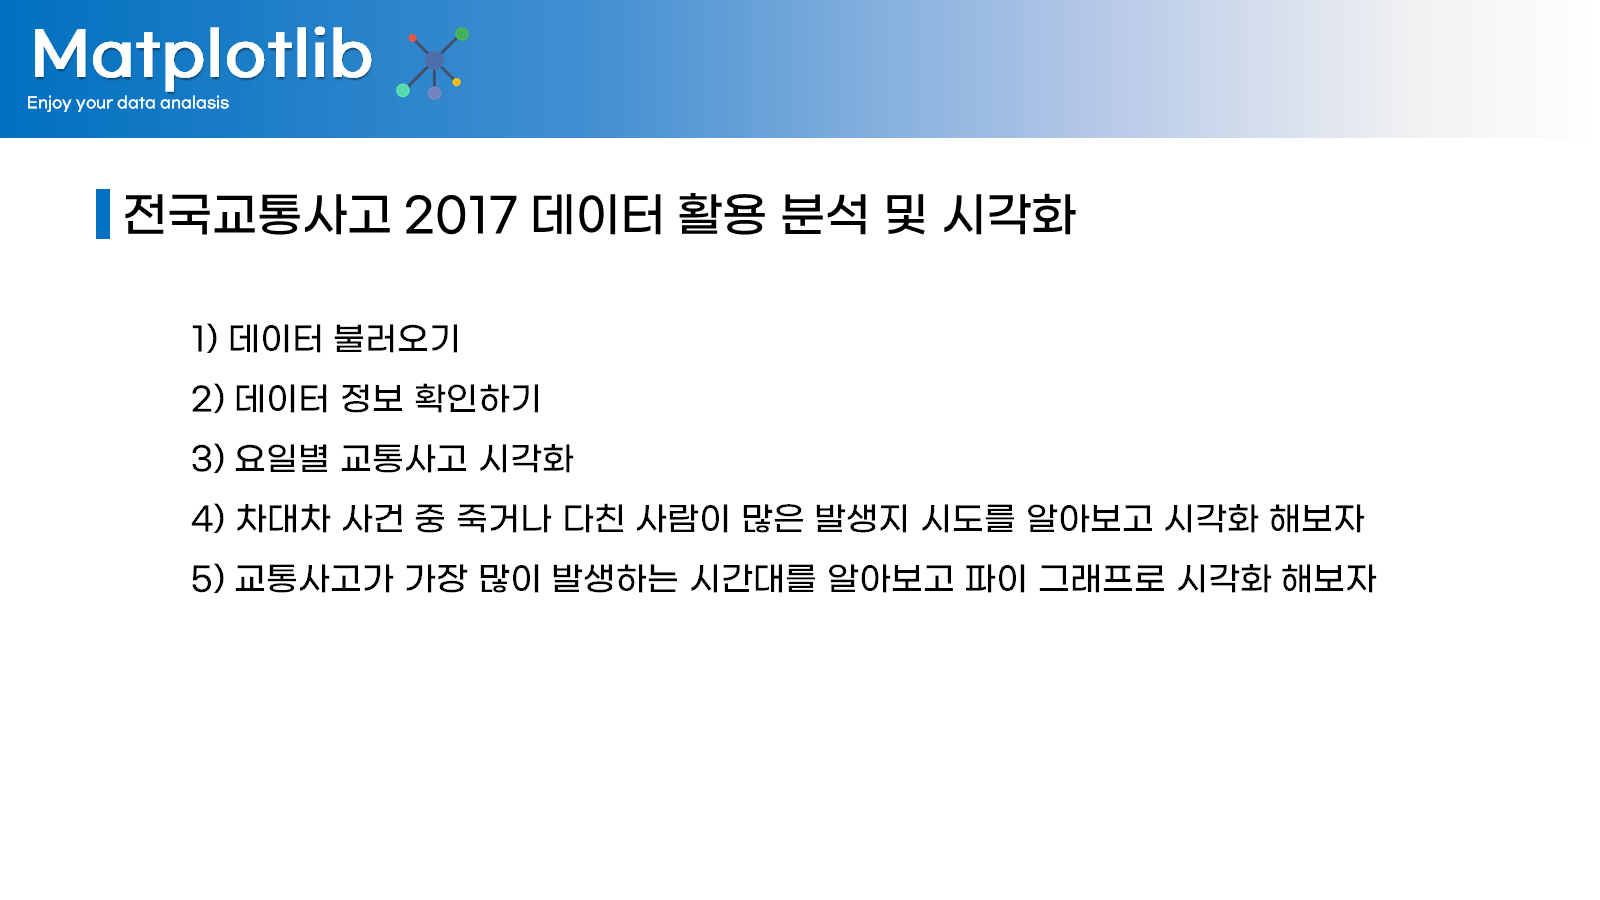

In [66]:
acc_data=pd.read_csv('./data/Traffic_Accident_2017.csv',encoding ='euc-kr')
pd.set_option('display.max_columns',None)
acc_data.tail(2)


,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
4063,2017,2017123120,40,야간,일,1,11,1,9,0,경기,동두천시,차대차,정면충돌,정면충돌,운전자법규위반,중앙선 침범,단일로,기타단일로,승용차,승용차,승용차,승용차,961004,1987481,127.056525,37.886331
4064,2017,2017123123,15,야간,일,1,1,0,0,0,대전,동구,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,이륜차,이륜차,보행자,보행자,995304,1814453,127.447679,36.327435


## 각 컬럼 width 최대로
pd.set_option('display.max_colwidth', -1)

## rows 500
pd.set_option('display.max_rows', 500)

## columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [11]:
# 데이터 정보 확인하기
acc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

C:\Users\SMHRD\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SMHRD\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SMHRD\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SMHRD\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SMHRD\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SMHRD\anaconda3

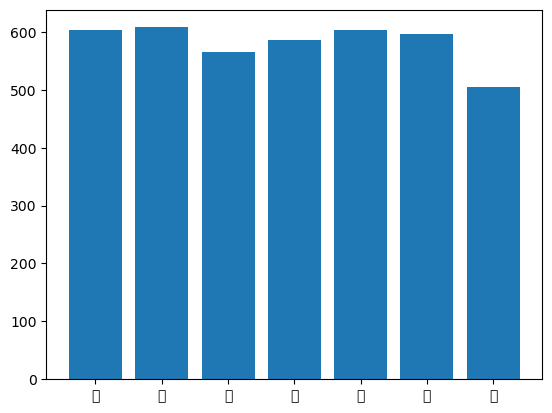

In [140]:
# 3. 요일별 교통사고 시각화
# acc_week=acc_data[['요일','발생년월일시']].groupby('요일').count()
# acc_week[[0,0]]
# acc_data.groupby('요일')
# x=acc_data.loc[:,'요일']
acc_week=acc_data['요일'].value_counts()
acc_week=acc_week[['월','화','수','목','금','토','일']]
acc_week

plt.bar(acc_week.index,acc_week)
plt.show()